In [1]:
import pickle as pkl 
import numpy as np 
import matplotlib.pyplot as plt
from qiskit.quantum_info import state_fidelity
import math

from analysis_utils import correct_counts, counts_to_statevector

## D1Q3 Error Analysis

In [2]:
# graph counts vs number shots
with open('d1q3_sampleincr_counts.pkl', 'rb') as f:
    sampleincr_counts_all = pkl.load(f)

with open('d1q3_sampleincr_statevector.pkl', 'rb') as f:
    sampleincr_sv_all = pkl.load(f)

In [3]:
keys = list(sampleincr_counts_all.keys())

fidelity_keys = []
fidelity_values = []

for power, iteration in keys:
    counts = sampleincr_counts_all[(power, iteration)]
    expected_sv = sampleincr_sv_all[(power, iteration)]

    if len(list(counts.values())) != pow(2, 9):
        counts = correct_counts(counts, 9)   

    counts_sv = counts_to_statevector(counts)

    fid = state_fidelity(counts_sv, expected_sv)

    fidelity_keys.append(power)
    fidelity_values.append(fid)

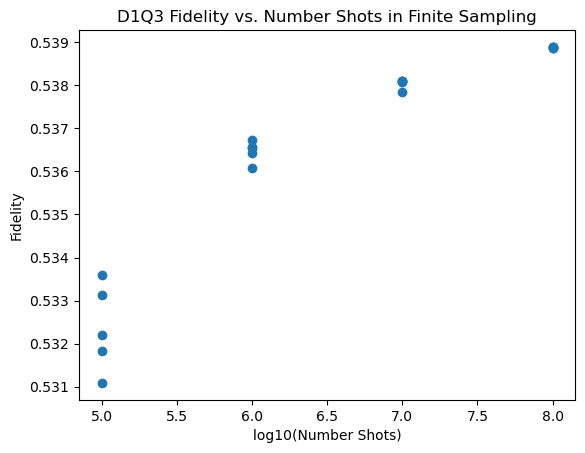

In [4]:
x = fidelity_keys
y = fidelity_values

plt.close('all')
plt.xlabel("log10(Number Shots)")
plt.ylabel("Fidelity")
plt.title(f"D1Q3 Fidelity vs. Number Shots in Finite Sampling")

plt.scatter(x, y)

plt.show()